In [75]:
# set up the environment
%pylab
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import seaborn as sns
sns.set()
import pandas as pd
import scipy as sp
import scipy.stats
import statsmodels.stats.api as sms
import statsmodels.api as sm

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


/Users/kallus/Applications/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
## Wald test for Bernoulli parameter

In [76]:
def generate_data(theta,n):
    return np.random.rand(n)<=theta


In [94]:
theta = 0.35
print 'theta =',theta
print 'I(theta) =',1/theta+1/(1-theta)

theta = 0.35
I(theta) = 4.3956043956


In [95]:
n = 100
dataset = generate_data(theta,n)
thetahat = np.mean(dataset)
print 'thetahat =',thetahat
print 'I(thetahat) =',1/thetahat+1/(1-thetahat)

thetahat = 0.34
I(thetahat) = 4.45632798574


In [96]:
SEhat = 1/np.sqrt(n/thetahat+n/(1-thetahat))
print 'SEhat =',SEhat

SEhat = 0.0473708771293


In [97]:
print 'Wald 95pct CI = [%f,%f]'%(thetahat-1.96*SEhat,thetahat+1.96*SEhat)

Wald 95pct CI = [0.247153,0.432847]


In [98]:
print 'Real SE =',np.std([np.mean(generate_data(theta,n)) for i in range(100000)])

Real SE = 0.0474891178166


In [99]:
with open("ARM_data/child.iq/kidiq.dta") as f:
    df = pd.read_stata(f)
df.head()

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1.0,121.117529,4,27
1,98,1.0,89.361882,4,25
2,85,1.0,115.443165,4,27
3,83,1.0,99.449639,3,25
4,115,1.0,92.745710,4,27


In [100]:
thetahat = df.mom_hs.mean()
SEhat = 1/np.sqrt(n/thetahat+n/(1-thetahat))
print 'Wald 95pct CI for mom_hs = [%f,%f]'%(thetahat-1.96*SEhat,thetahat+1.96*SEhat)

Wald 95pct CI for mom_hs = [0.705290,0.866138]


In [ ]:
## Wald test for coefficient of variation

In [101]:
def generate_normals(mu,sigma,n):
    return np.random.randn(n)*sigma+mu


In [102]:
mu = 4.
sigma = 2.
g = lambda m,s: s/m
tau = g(mu,sigma)
print 'mu = %f, sigma = %f, tau = %f'%(mu,sigma,tau)

mu = 4.000000, sigma = 2.000000, tau = 0.500000


In [110]:
n = 500
dataset = generate_normals(mu,sigma,n)
muhat = np.mean(dataset)
sigmahat = np.std(dataset,ddof=0)
tauhat = g(muhat,sigmahat)
print 'muhat = %f, sigmahat = %f, tauhat = %f'%(muhat,sigmahat,tauhat)

muhat = 3.918276, sigmahat = 1.880690, tauhat = 0.479979


In [111]:
SEhat = np.abs(tauhat)*np.sqrt(tauhat**2+0.5)/np.sqrt(n)
print 'SEhat =',SEhat

SEhat = 0.018344737901


In [112]:
print 'Wald CI = [%f,%f]'%(tauhat-1.96*SEhat,tauhat+1.96*SEhat)

Wald CI = [0.444023,0.515935]


In [113]:
coeffofvar = lambda x: np.std(x,ddof=0)/np.mean(x)
print 'Real SE =',np.std([coeffofvar(generate_normals(mu,sigma,n)) for i in range(100000)])


Real SE = 0.0193921513292


In [114]:
muhat = np.mean(df.kid_score)
sigmahat = np.std(df.kid_score,ddof=0)
tauhat = g(muhat,sigmahat)
SEhat = np.abs(tauhat)*np.sqrt(tauhat**2+0.5)/np.sqrt(n)
print 'Wald 95pct CI for kid score coeff of var = [%f,%f]'%(thetahat-1.96*SEhat,thetahat+1.96*SEhat)

Wald 95pct CI for kid score coeff of var = [0.770374,0.801055]


In [ ]:
## modelling relationships

In [115]:
df.head()

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1.0,121.117529,4,27
1,98,1.0,89.361882,4,25
2,85,1.0,115.443165,4,27
3,83,1.0,99.449639,3,25
4,115,1.0,92.745710,4,27


/Users/kallus/Applications/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  if __name__ == '__main__':


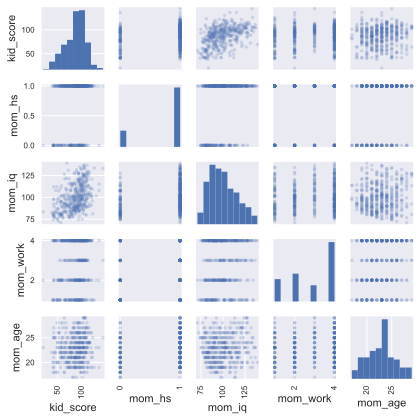

In [116]:
pd.tools.plotting.scatter_matrix(df, alpha=0.2, figsize=(6, 6))
tight_layout()

In [117]:
Y=df.kid_score
X=df[["mom_hs","mom_iq","mom_work","mom_age"]]

In [118]:
print Y

0       65
1       98
2       85
3       83
4      115
5       98
6       69
7      106
8      102
9       95
10      91
11      58
12      84
13      78
14     102
15     110
16     102
17      99
18     105
19     101
20     102
21     115
22     100
23      87
24      99
25      96
26      72
27      78
28      77
29      98
      ... 
404     96
405     65
406     64
407     95
408     56
409     75
410     91
411    106
412     76
413     90
414    108
415     86
416     85
417    104
418     87
419     41
420    106
421     76
422    100
423     89
424     42
425    102
426    104
427     59
428     93
429     94
430     76
431     50
432     88
433     70
Name: kid_score, Length: 434, dtype: int32


In [119]:
print X

     mom_hs      mom_iq  mom_work  mom_age
0       1.0  121.117529         4       27
1       1.0   89.361882         4       25
2       1.0  115.443165         4       27
3       1.0   99.449639         3       25
4       1.0   92.745710         4       27
5       0.0  107.901838         1       18
6       1.0  138.893106         4       20
7       1.0  125.145119         3       23
8       1.0   81.619526         1       24
9       1.0   95.073069         1       19
10      1.0   88.576998         1       23
11      1.0   94.859708         4       24
12      1.0   88.962801         4       27
13      1.0  114.114297         4       26
14      0.0  100.534072         2       24
15      1.0  120.419146         1       26
16      1.0  114.426877         3       23
17      1.0  111.592358         3       26
18      1.0  133.849227         4       20
19      0.0   97.264801         3       17
20      1.0  110.096806         4       21
21      1.0  126.723994         2       26
22      1.0